# Main Metrics

This notebook:

1) Loads a list of stories as input

2) Computes following ratios and indices

1. signed (%)
2. digital first (0 to 100)
* international (%)
* varied (0 to 100)
* fast (0 to 100)

3) Exports data for the selected time frame

© Paul Ronga under Apache-2 Licence (see LICENCE.txt).

In [1]:
import pandas as pd
import requests
from IPython.display import HTML
import json
from bs4 import BeautifulSoup
import datetime

In [2]:
medias = pd.read_csv('df/media_list.csv', usecols=['media_id', 'Name'])

In [3]:
df = pd.read_csv('df/stories.csv', usecols = ['id', 'title', 'absolute_url', 'time_start', 'time_end', 'minutes',
       'delta_str', 'link', 'media', 'media_id', 'story_time', 'agency', 'editor', 'heading', 'domains'])

### Select time frame using date index

In [4]:
# Get and check the last week's time frame

today = datetime.datetime.now()
delta_days = (today.weekday() + 1) % 7
today - datetime.timedelta(7 + delta_days)


last_sunday = today - datetime.timedelta(delta_days)
last_monday = last_sunday - datetime.timedelta(6)
print('Last Sunday should be {}, {} days ago.'.format(last_sunday.strftime('%B %d') , delta_days ))
print('The previous Monday should be {}.'.format(last_monday.strftime('%B %d') , delta_days ))

Last Sunday should be June 17, 6 days ago.
The previous Monday should be June 11.


In [5]:
# Date index
df['time_start'] = pd.to_datetime(df['time_start'])
df['time_end'] = pd.to_datetime(df['time_end'])
df.index = df['time_start']

In [6]:
start_timestamp = last_monday.strftime('%Y-%m-%d')
end_timestamp = last_sunday.strftime('%Y-%m-%d')
df[start_timestamp:end_timestamp].shape

(1322, 15)

In [7]:
df = df[start_timestamp:end_timestamp].copy()

In [8]:
# Check for errors
df[df['link'] != df['link']]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains
time_start,,,,,,,,,,,,,,,
2018-06-11 10:03:00,12909,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:03:00,2018-06-11 10:06:00,3,3’,NaN,https://www.lematin.ch/,25,0.1386,0,1,NaN,NaN
2018-06-11 10:06:00,12910,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:06:00,2018-06-11 10:09:00,3,3’,NaN,https://www.lematin.ch/,25,0.1438,0,1,NaN,NaN
2018-06-11 10:09:00,12911,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:09:00,2018-06-11 10:12:00,3,3’,NaN,https://www.lematin.ch/,25,0.0806,0,1,NaN,NaN
2018-06-11 10:12:00,12912,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:12:00,2018-06-11 10:15:00,3,3’,NaN,https://www.lematin.ch/,25,0.0936,0,1,NaN,NaN
2018-06-11 10:15:00,12913,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:15:00,2018-06-11 10:18:00,3,3’,NaN,https://www.lematin.ch/,25,0.1473,0,1,NaN,NaN
2018-06-11 14:09:00,12976,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 14:09:00,NaT,0,NaN,NaN,https://www.lematin.ch/,25,0.0883,0,1,NaN,NaN
2018-06-11 16:48:00,13005,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 16:48:00,2018-06-11 16:51:00,3,3’,NaN,https://www.lematin.ch/,25,0.0934,0,1,NaN,NaN
2018-06-12 00:00:00,13080,Erreur 503 de la homepage,https://www.20min.ch/ro/,2018-06-12 00:00:00,2018-06-12 00:03:00,3,3’,NaN,https://www.20min.ch/ro/,24,0.9078,0,0,NaN,NaN


In [9]:
df = df[df['link'] == df['link']].copy()
df = df[df['link'] != '#'].copy()

In [10]:
df.shape

(1314, 15)

### Get back to numeric index

In [11]:
df.index = df.id

In [14]:
# On retire Konbini Suisse et France
df = df[df['media_id'] < 34].copy()
medias = medias[medias['media_id'] < 34].copy()

# 1. “Signed” ratio

In [18]:
def getEditorRatio(_group):
    if len(_group) == 0:
        print('Error: length is 0')
        return False
    print('Editor ratio for {}: {} / {}'.format(_group['media'].values[0], len(_group[_group['editor'] == 1]), len(_group)))
    return len(_group[_group['editor'] == 1]) / len(_group)

In [19]:
# Fix for La Liberté using the story path
for i, row in df[df['media_id'] == 32].iterrows():
    if row['link'].split('/')[1] == 'news-agence':
        df.at[i, 'agency'] = 1
        df.at[i, 'editor'] = 0
    else:
        df.at[i, 'editor'] = 1
        df.at[i, 'agency'] = 0

In [20]:
medias['signed'] = -1
for i, row in medias.iterrows():
    print(i)
    group = df[df['media_id'] == row['media_id']]
    editorRatio = getEditorRatio(group)
    print(editorRatio, round(editorRatio * 100))
    medias.at[i, 'signed'] = round(editorRatio * 100)

0
Editor ratio for https://www.tdg.ch/: 41 / 94
0.43617021276595747 44
1
Editor ratio for https://www.24heures.ch: 21 / 61
0.3442622950819672 34
2
Editor ratio for https://www.letemps.ch: 32 / 66
0.48484848484848486 48
3
Editor ratio for https://www.lemonde.fr: 57 / 120
0.475 48
4
Editor ratio for https://www.rts.ch/info/: 0 / 116
0.0 0
5
Editor ratio for https://www.20min.ch/ro/: 26 / 79
0.3291139240506329 33
6
Editor ratio for https://www.lematin.ch/: 37 / 122
0.30327868852459017 30
7
Editor ratio for https://www.mediapart.fr: 15 / 21
0.7142857142857143 71
8
Editor ratio for https://www.lefigaro.fr/: 33 / 74
0.44594594594594594 45
9
Editor ratio for https://www.liberation.fr/: 57 / 78
0.7307692307692307 73
10
Editor ratio for https://www.lacote.ch/: 32 / 61
0.5245901639344263 52
11
Editor ratio for https://www.arcinfo.ch/: 27 / 57
0.47368421052631576 47
12
Editor ratio for https://www.lenouvelliste.ch/: 37 / 91
0.4065934065934066 41
13
Editor ratio for https://www.laliberte.ch/: 19 /

In [21]:
medias

,media_id,Name,signed
0,19,La Tribune de Genève,44
1,20,24 heures,34
2,21,Le Temps,48
3,22,Le Monde,48
4,23,RTS info,0
5,24,20 minutes (ch),33
6,25,Le Matin,30
7,26,Mediapart,71
8,27,Le Figaro,45
9,28,Libération,73


## Get headings

In [22]:
# Sorry for this
def getHeading(_media_id, _link):
    url_parts = _link.split('/')

    # tg, vqh, lm        
    if _media_id in (19, 20, 25):
        return url_parts[1]
            
    # le temps
    elif _media_id == 21:
        if url_parts[1] == 'node':
            return 'longform'
        else:
            return url_parts[1]
    
    # le monde
    elif _media_id == 22:
        return url_parts[1]
    
    # rts info
    elif _media_id == 23:
        return url_parts[2]
    
    # mediapart
    elif _media_id == 26:
        return url_parts[2]
    
    # Libé
    elif _media_id == 28:
        if url_parts[1] in ['france', 'politiques']:
            return 'national'
        elif url_parts[1] == 'planete':
            return 'international'
        else:
            return url_parts[1]
    
    # 20 minutes
    elif _media_id == 24:
        if url_parts[2] != 'news':
            return url_parts[2]
            
        else:
            return url_parts[3]
        
    # le figaro (27): 3
    elif _media_id == 27:
        
        return url_parts[3]
    
    # La Côte, Le Nouvelliste, La Liberté
    elif _media_id in (29, 30, 31, 32):
        if url_parts[2] in ('valais', 'regions', 'canton'):
            return 'région'
        else:
            return url_parts[2]

    # Le Courrier    
    elif _media_id == 33:
        return ''
    
    else:
        print('Media', _media_id, 'not in list missing')
        return 'missing' + str(_media_id)

In [23]:
df['heading'] = ''
for i, row in df.iterrows():
    if row['media_id'] != 33: # Le Courrier: manuel
        df.at[i, 'heading'] = getHeading(row['media_id'], row['link'])
    else:
        # These headings get fixed right below
        print('C', end='')

CCCCCCCCCCCCCC

In [24]:
# Add heading for Le Courrier
print("We’ll get {} missing headings for “Le Courrier”".format( df[df['media_id'] == 33].shape[0]) )

We’ll get 14 missing headings for “Le Courrier”


In [25]:
for i, row in df[df['media_id'] == 33].iterrows():
    print(row['absolute_url'])
    ua_headers = {'User-Agent': 'Quel-media-bot (+https://www.quel-media.com/about.html#robot)'}
    response = requests.get(row['absolute_url'], headers=ua_headers)
    if not response:
        print('Error loading', row['absolute_url'])
    elif response.status_code != 200:
        print('Error {} when loading {}'.format( response.status_code, row['url'] ) )
    doc = BeautifulSoup(response.content, 'html.parser')    
    tags = doc.select('.c-Article-theme .c-Article-breadcrumb-tagsLink')
    print(tags)
    if len(tags) > 0:
        tag = tags[0]
        print(tag.string, tag.get('href'))
        df.at[i, 'heading'] = tag.string
    else:
        print('No tag found')
    print()

https://lecourrier.ch/2018/06/10/g7-un-sommet-dhypocrisie/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/rubrique/international/">International</a>]
International /rubrique/international/

https://lecourrier.ch/2018/06/11/je-mene-campagne-depuis-ma-cellule/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/theme/solidarite/">Solidarité</a>]
Solidarité /theme/solidarite/

https://lecourrier.ch/2018/06/11/le-chef-de-cabinet-epargne/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/theme/geneve/">Genève</a>]
Genève /theme/geneve/

https://lecourrier.ch/2018/06/12/haine-gratuite-et-invisibilisee/ 
Error loading https://lecourrier.ch/2018/06/12/haine-gratuite-et-invisibilisee/ 
[]
No tag found

https://lecourrier.ch/2018/06/12/haine-gratuite-et-invisible/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/theme/neuchatel/">Neuchâtel</a>]
Neuchâtel /theme/neuchatel/

https://lecourrier.ch/2018/06/12/un-cours-climato-sceptique-a-calvin/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/th

In [26]:
df[df['media_id'] == 33]['heading'].value_counts()

Genève           4
Vaud             3
International    2
Neuchâtel        1
Suisse           1
Solidarité       1
Égalité          1
                 1
Name: heading, dtype: int64

The missing article was actually moved to https://lecourrier.ch/2018/06/12/haine-gratuite-et-invisible/ without redirect. This needs to be fixed by hand.

## minutes_day
Ajouter une colonne minutes_day ne comptant que les minutes du jour.
Même principe pour les minutes des heures à fort trafic: 7h-8h, 12h-13h

In [27]:
sevenAM = datetime.time(7, 0)
elevenPM = datetime.time(23, 0)

In [28]:
sevenAM.strftime('%H:%M'), elevenPM.strftime('%H:%M')

('07:00', '23:00')

In [29]:
df['minutes_day'] = 0

In [30]:
sevenAM = datetime.time(7, 0)
elevenPM = datetime.time(23, 0)

for i, row in df.iterrows():
    if row['time_end'] != row['time_end']: # NaT
        continue
    startTime = row['time_start'].time()
    endTime = row['time_end'].time()
    if startTime.hour < 7:
        startTime = sevenAM
    elif startTime.hour > 23:
        startTime = elevenPM
    if endTime.hour < 7:
        endTime = sevenAM
    elif endTime.hour > 23:
        endTime = elevenPM
        
    startDate = datetime.datetime.combine(row['time_start'].date(), startTime)
    endDate = datetime.datetime.combine(row['time_end'].date(), endTime)
    delta = endDate - startDate
    if delta != 0:
        df.at[i, 'minutes_day'] = round(delta.seconds / 60)
    else:
        df.at[i, 'minutes_day'] = 0

In [31]:
# Check results
df[['time_start', 'time_end', 'minutes', 'minutes_day']]

,time_start,time_end,minutes,minutes_day
id,,,,
12873,2018-06-11 02:54:00,NaT,0,0
12875,2018-06-11 04:45:00,2018-06-11 05:15:00,30,0
12876,2018-06-11 05:15:00,2018-06-11 07:12:00,117,12
12877,2018-06-11 05:27:00,2018-06-11 08:39:00,192,99
12878,2018-06-11 06:12:00,2018-06-11 06:36:00,24,0
12879,2018-06-11 06:33:00,2018-06-11 11:06:00,273,246
12880,2018-06-11 06:36:00,2018-06-11 08:06:00,90,66
12881,2018-06-11 06:45:00,2018-06-11 07:03:00,18,3
12882,2018-06-11 06:48:00,2018-06-11 11:51:00,303,291


In [32]:
# Have a look at some absolute values

targetMedia = 22 # Le Monde

top_headings = df[df['media_id'] == targetMedia]['heading'].value_counts().head(2).index

top_sum = 0
for heading in top_headings:
    results = df[(df['media_id'] == targetMedia) & (df['heading'] == heading)]
    print(heading, len(results), results['minutes'].sum(), results['minutes_day'].sum())
    
    results_day = results[results['minutes_day'] != 0]
    print('Durée moyenne: {} minutes'.format( results_day['minutes_day'].sum() / len(results_day) ))
    
    top_sum += results['minutes_day'].sum()
    
print("Part des deux rubriques principales:", top_sum / df[(df['media_id'] == targetMedia)]['minutes_day'].sum())

mondial-2018 46 4332 4470
Durée moyenne: 103.95348837209302 minutes
europe 26 957 957
Durée moyenne: 36.80769230769231 minutes
Part des deux rubriques principales: 0.5602353669866832


In [34]:
# Absolute values in hours (rounded down)
# All this needs to be refined
for media_id in medias['media_id'].tolist():
    # Heures
    print(medias[medias['media_id'] == media_id]['Name'].values[0])
    heading_times = df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum()//60
    print(heading_times.sort_values(ascending=False).head(10))

La Tribune de Genève
heading
geneve            64
coupe-du-monde    30
monde             19
suisse            15
sports             6
                   5
economie           3
culture            0
Name: minutes_day, dtype: int64
24 heures
heading
vaud-regions      56
sports            46
coupe-du-monde    30
suisse            23
                   4
monde              3
news               1
Name: minutes_day, dtype: int64
Le Temps
heading
monde        78
suisse       24
economie     17
sport        16
lifestyle     7
culture       5
opinions      4
longform      3
societe       1
sciences      0
Name: minutes_day, dtype: int64
Le Monde
heading
mondial-2018       74
international      34
europe             15
les-decodeurs      14
asie-pacifique     12
idees               2
emmanuel-macron     2
economie            2
politique           1
sante               0
Name: minutes_day, dtype: int64
RTS info
heading
monde            77
regions          42
suisse           19
economie         11

In [35]:
heading_times.std()

9.691675367477567

In [36]:
# Relative values
for media_id in medias['media_id'].tolist():
    # Heures
    theMedia = medias[medias['media_id'] == media_id]
    mediaSum = df[df['media_id'] == media_id]['minutes_day'].sum()
    print(theMedia['Name'].values[0], 'total:', mediaSum)
    heading_times = (round(100 * df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum() / mediaSum)).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    print('Dev', round(heading_times['minutes_day'].std()), 'top5',round(heading_times.sort_values('minutes_day', ascending=False).head().std()))
    
    #others = 100 - heading_times[heading_times['minutes_day'] >= 5]['minutes_day'].sum()
    #heading_times.loc['autres'] = {'minutes_day': others}
    #print(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())



La Tribune de Genève total: 8775
Dev 15.0 top5 minutes_day    15.0
dtype: float64
24 heures total: 10017
Dev 9.0 top5 minutes_day    9.0
dtype: float64
Le Temps total: 9696
Dev 18.0 top5 minutes_day    18.0
dtype: float64
Le Monde total: 9687
Dev 16.0 top5 minutes_day    16.0
dtype: float64
RTS info total: 9789
Dev 17.0 top5 minutes_day    17.0
dtype: float64
20 minutes (ch) total: 9837
Dev 7.0 top5 minutes_day    5.0
dtype: float64
Le Matin total: 9912
Dev 9.0 top5 minutes_day    9.0
dtype: float64
Mediapart total: 10335
Dev 30.0 top5 minutes_day    30.0
dtype: float64
Le Figaro total: 9663
Dev 14.0 top5 minutes_day    14.0
dtype: float64
Libération total: 9912
Dev 18.0 top5 minutes_day    18.0
dtype: float64
La Côte total: 9876
Dev 17.0 top5 minutes_day    17.0
dtype: float64
Arcinfo total: 10044
Dev 14.0 top5 minutes_day    14.0
dtype: float64
Le Nouvelliste total: 9738
Dev 15.0 top5 minutes_day    15.0
dtype: float64
La Liberté total: 10134
Dev 19.0 top5 minutes_day    19.0
dtype: 

In [37]:
heading_times.sort_values('minutes_day', ascending=False).head(2)

,minutes_day
heading,
Genève,28.0
Suisse,15.0


In [38]:
def getVariedRatioByTop(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    
    return 100 - round(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())

In [39]:
def getVariedRatioByStd(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    
    # print(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())
    return 500 / round(heading_times.sort_values('minutes_day', ascending=False).head().std())

In [40]:
medias['varied'] = -1

for i, row in medias.iterrows():
    group = df[df['media_id'] == row['media_id']]
    medias.at[i, 'varied'] = (getVariedRatioByTop(group) + getVariedRatioByStd(group)) / 2

medias

,media_id,Name,signed,varied
0,19,La Tribune de Genève,44,34
1,20,24 heures,34,46
2,21,Le Temps,48,31
3,22,Le Monde,48,32
4,23,RTS info,0,28
5,24,20 minutes (ch),33,78
6,25,Le Matin,30,51
7,26,Mediapart,71,12
8,27,Le Figaro,45,39
9,28,Libération,73,27


In [41]:
heading_times['heading'] = heading_times.index

# 3. “international” ratio

In [44]:
def getInternationalRatio(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    # monde$ to avoid “coupe du monde au brésil”
    result = heading_times[heading_times.index.str.contains('international|monde$', flags=re.IGNORECASE)]
    print(*result.index.tolist())
    return result['minutes_day'].sum()

In [45]:
medias['international'] = -1

for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'international'] = getInternationalRatio(group)
medias

coupe-du-monde monde
coupe-du-monde monde
monde
international
monde
monde
coupe-du-monde monde
international
international
international
monde

monde
international
International


,media_id,Name,signed,varied,international
0,19,La Tribune de Genève,44,34,35
1,20,24 heures,34,46,20
2,21,Le Temps,48,31,49
3,22,Le Monde,48,32,21
4,23,RTS info,0,28,47
5,24,20 minutes (ch),33,78,22
6,25,Le Matin,30,51,30
7,26,Mediapart,71,12,26
8,27,Le Figaro,45,39,43
9,28,Libération,73,27,25


# “Digital first” index

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

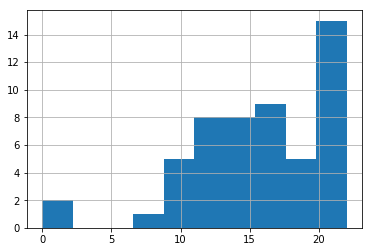

In [47]:
# Tribune de Genève
group = df[(df['media_id'] == 19) & (df['editor'] != 1)]
group['time_start'].dt.hour.hist()

In [48]:
df.index = df.time_start

In [49]:
def getDigitalFirstRatio(_group):
    _group = _group[(_group['time_start'].dt.hour > 7) & (_group['time_start'].dt.hour < 24) & (_group['editor'] == 1)]
    
    if len(_group) < 1:
        print('No signed stories found')
        return -1
    
    morning = _group[_group.index.hour < 16]
    evening = _group[_group.index.hour >= 16]
    
    return int( round( 100 * len(morning) / len(_group) ) )

In [50]:
medias['digitalfirst'] = -1

for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'digitalfirst'] = getDigitalFirstRatio(group)
medias

No signed stories found


,media_id,Name,signed,varied,international,digitalfirst
0,19,La Tribune de Genève,44,34,35,30
1,20,24 heures,34,46,20,32
2,21,Le Temps,48,31,49,59
3,22,Le Monde,48,32,21,62
4,23,RTS info,0,28,47,-1
5,24,20 minutes (ch),33,78,22,50
6,25,Le Matin,30,51,30,64
7,26,Mediapart,71,12,26,40
8,27,Le Figaro,45,39,43,43
9,28,Libération,73,27,25,45


# 5. “Fast” index

In [53]:
df_speed = pd.read_csv('df/speed_metrics.csv', usecols=['fully_loaded_time', 'media_id', 'page_load_time',
       'pagespeed_score', 'report_url'])

In [54]:
dfm = medias.merge(df_speed, on='media_id')

In [55]:
dfm['fast'] = -1
for i, row in dfm.iterrows():
    # threshold for e-commerce according to Google: 2 seconds
    # let's be very nice and say: 5 seconds
    pageLoadExcess = row['page_load_time'] - 5
    
    # no negative index
    if pageLoadExcess < 0:
        pageLoadExcess = 0

    # Some websites take more than 30 seconds to load. It seems we need to give up using something exponential
    # loadIndex = pow(pageLoadExcess, 1.1)
    
    loadIndex = 5 * pageLoadExcess
    pageLoadRatio = 100 - loadIndex
    if pageLoadRatio < 0:
        pageLoadRatio = 0

    dfm.at[i, 'fast'] = (pageLoadRatio + row['pagespeed_score']*3) / 4
dfm

,media_id,Name,signed,varied,international,digitalfirst,pagespeed_score,page_load_time,fully_loaded_time,report_url,fast
0,19,La Tribune de Genève,44,34,35,30,25,9.454,10.258,https://gtmetrix.com/reports/www.tdg.ch/ptzXarQY,38
1,20,24 heures,34,46,20,32,24,10.750,12.179,https://gtmetrix.com/reports/www.24heures.ch/h...,35
2,21,Le Temps,48,31,49,59,57,11.580,13.062,https://gtmetrix.com/reports/www.letemps.ch/fg...,59
3,22,Le Monde,48,32,21,62,27,13.534,22.506,https://gtmetrix.com/reports/www.lemonde.fr/GO...,34
4,23,RTS info,0,28,47,-1,57,5.277,5.676,https://gtmetrix.com/reports/www.rts.ch/o9jLUVhu,67
5,24,20 minutes (ch),33,78,22,50,11,13.036,15.314,https://gtmetrix.com/reports/www.20min.ch/NxCe...,23
6,25,Le Matin,30,51,30,64,0,13.715,15.487,https://gtmetrix.com/reports/www.lematin.ch/xq...,14
7,26,Mediapart,71,12,26,40,22,4.976,5.473,https://gtmetrix.com/reports/www.mediapart.fr/...,41
8,27,Le Figaro,45,39,43,43,33,8.459,16.457,https://gtmetrix.com/reports/www.lefigaro.fr/w...,45
9,28,Libération,73,27,25,45,32,5.896,6.719,https://gtmetrix.com/reports/www.liberation.fr...,47


In [56]:
outputfile = 'df/archive/media_metrics_{}.csv'.format( datetime.datetime.now().strftime('%Y-%m-%d') )
print('Saving archive to {}...'.format(outputfile))

Saving archive to df/archive/media_metrics_2018-06-23.csv...


In [67]:
dfm['Id'] = dfm.index

In [68]:
dfm[['Id', 'Name', 'media_id', 'signed', 'varied', 'international', 'digitalfirst', 'fast']].to_csv('df/media_metrics.csv')
dfm[['Id', 'Name', 'media_id', 'signed', 'varied', 'international', 'digitalfirst', 'fast']].to_csv(outputfile, index=False)